In [1]:
import TMQGP as tm
import QuarkTM
import tqdm

In [2]:
import matplotlib
matplotlib.style.use('publication23')

In [3]:
from numpy import *

In [4]:
mQ = 0.6

In [5]:
erange1 = linspace(-5, 5, 401)
qrange1 = linspace(0, 5, 201)

erange2 = linspace(-5, 5, 101)
qrange2 = linspace(0, 5, 27)

In [6]:
pt1 = QuarkTM.Particle(mQ, qrange1, erange1)
pt2 = QuarkTM.Particle(mQ, qrange2, erange2)

In [7]:
T = 0.17

In [8]:
ch1 = QuarkTM.Channel(pt1, pt1, T)
ch2 = QuarkTM.Channel(pt2, pt2, T)

# np.savetxt('G2_1.dat', ch1.G2)
# np.savetxt('G2_2.dat', ch2.G2)


In [9]:
# G2_1 = np.loadtxt('G2_1.dat', dtype=complex)
# G2_2 = np.loadtxt('G2_2.dat', dtype=complex)

# ch1 = QuarkTM.Channel(pt1, pt1, T, G2=G2_1)
# ch2 = QuarkTM.Channel(pt2, pt2, T, G2=G2_2)

In [10]:
e = 3.5
ie1 = argmin(abs(erange1 - e))
ie2 = argmin(abs(erange2 - e))

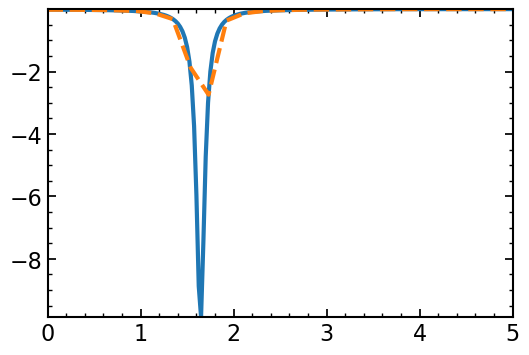

In [11]:
plt.plot(qrange1, imag(ch1.G2[ie1, :]))
plt.plot(qrange2, imag(ch2.G2[ie2, :]), ls='--')

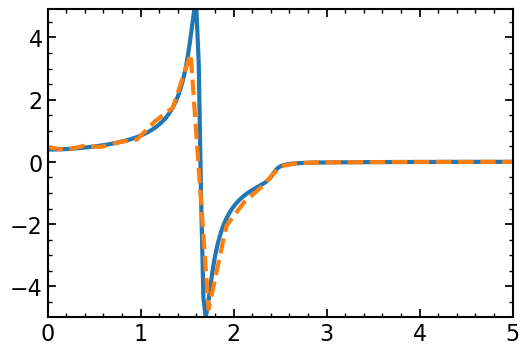

In [12]:
plt.plot(qrange1, real(ch1.G2[ie1, :]))
plt.plot(qrange2, real(ch2.G2[ie2, :]), ls='--')

## Try convolution as integral

In [13]:
iR_d = tm.InterDenom2D(qrange2, erange2, ascontiguousarray(real(-pi/pt2.Gtab)), ascontiguousarray(imag(-pi/pt2.Gtab)), 
                      'imag')

In [14]:
c1 = array([tm.G2_conv_ff(e, q, T, pt1.R, pt1.R) for q in tqdm.notebook.tqdm(qrange1)])

  0%|          | 0/201 [00:00<?, ?it/s]

In [15]:
c2 = array([tm.G2_conv_ff(e, q, T, pt2.R, pt2.R) for q in tqdm.notebook.tqdm(qrange1)])

  0%|          | 0/201 [00:00<?, ?it/s]

In [16]:
c2_2 = array([tm.G2_conv_ff(e, q, T, iR_d, iR_d) for q in tqdm.notebook.tqdm(qrange1)])

  0%|          | 0/201 [00:00<?, ?it/s]

(1.5, 2.0)

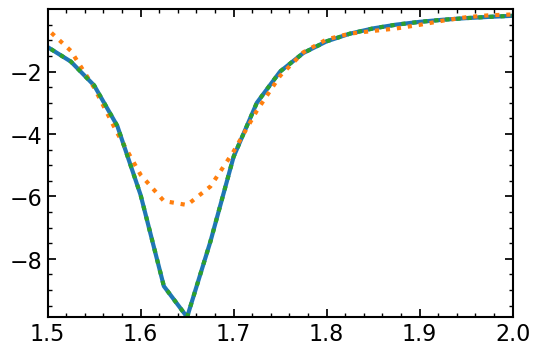

In [17]:
plt.plot(qrange1, -pi*c1)

plt.plot(qrange1, -pi*c2, ls=':')
plt.plot(qrange1, -pi*c2_2, ls=':')

# plt.plot(qrange1, imag(ch1.G2[ie1, :]), marker='.')

# plt.plot(qrange2, imag(ch2.G2[ie2, :]), ls='--')

plt.xlim(1.5, 2)

# Check the real part as an integral

In [31]:
r1 = array([tm.ReG2_conv_ff(e, q, T, pt1.R, pt1.R) for q in tqdm.notebook.tqdm(qrange1)])

  0%|          | 0/201 [00:00<?, ?it/s]

In [19]:
# r2 = array([tm.ReG2_conv_ff(e, q, T, pt2.R, pt2.R) for q in tqdm.notebook.tqdm(qrange1)])

In [20]:
# r2_2 = array([tm.ReG2_conv_ff(e, q, T, iR_d, iR_d) for q in tqdm.notebook.tqdm(qrange1)])

In [21]:
# plt.plot(qrange1, real(ch1.G2[ie1, :]))

# plt.plot(qrange1, -r1)
# plt.plot(qrange1, -r2, ls=':')
# plt.plot(qrange1, -r2_2, ls=':')

# plt.xlim(1, 5)

### Check the automatic version

Find the peak position as a function of q

In [22]:
from scipy.optimize import minimize

In [23]:
oms_peak2 = []
gamma2 = []
init = mQ
for q in qrange2:
    x = minimize(lambda z: -iR_d(q, float(z)), init)
    oms_peak2 += [float(x.x)]
    init = x.x
    gamma2 += [0.05]

oms_peak2 = array(oms_peak2)
gamma2 = array(gamma2)

/tmp/ipykernel_42464/1261236724.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = minimize(lambda z: -iR_d(q, float(z)), init)
/tmp/ipykernel_42464/1261236724.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x = minimize(lambda z: -iR_d(q, float(z)), init)
/tmp/ipykernel_42464/1261236724.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  oms_peak2 += [float(x.x)]
/tmp/ipykernel_42464/1261236724.py:5: DeprecationWarning: Conversion of an array with ndim > 

In [24]:
iPole = tm.PoleInterpolator(qrange2, erange2, ascontiguousarray(real(-pi/pt2.Gtab)), ascontiguousarray(imag(-pi/pt2.Gtab)), 
                           qrange2, oms_peak2, gamma2, 'imag')

In [25]:
iPole(0.5, 0.5)

0.1951260183938864

In [26]:
oms_peak2

array([0.6       , 0.63006527, 0.71269137, 0.83237024, 0.97555931,
       1.13338263, 1.30052333, 1.47381483, 1.65132186, 1.83181934,
       2.01450362, 2.1988297 , 2.38441686, 2.57099202, 2.7583547 ,
       2.94635468, 3.13487728, 3.3238336 , 3.51315364, 3.70278161,
       3.89267252, 4.08278968, 4.27310288, 4.46358706, 4.65422121,
       4.84498764, 4.84498764])

In [27]:
iPole.iPole(0.)

0.6

In [28]:
iPole.iWidth(0.5)

0.05

In [29]:
r2_3 = array([tm.ReG2_pole(e, q, T, iPole, iPole) for q in tqdm.notebook.tqdm(qrange1)])

  0%|          | 0/201 [00:00<?, ?it/s]

(1.0, 5.0)

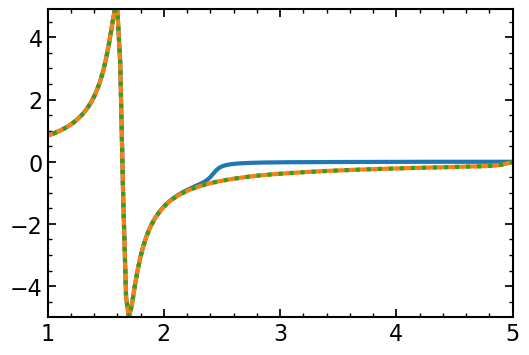

In [32]:
plt.plot(qrange1, real(ch1.G2[ie1, :]))

plt.plot(qrange1, -r1)
# plt.plot(qrange1, -r2, ls=':')
plt.plot(qrange1, -r2_3, ls=':')

plt.xlim(1, 5)

In [30]:
r2_3

array([9.62857941, 9.62857777, 9.6285754 , 9.62857126, 9.62856216,
       9.62853178, 9.62856732, 9.62857765, 9.62858407, 9.62858871,
       9.62859227, 9.62859507, 9.6285972 , 9.62859869, 9.62859948,
       9.62859944, 9.6285983 , 9.62859556, 9.62859005, 9.62857764,
       9.62855883, 9.62858276, 9.62859108, 9.62859584, 9.62859865,
       9.62859991, 9.62859957, 9.62859718, 9.62859143, 9.62857718,
       9.62856502, 9.62858541, 9.62859326, 9.62859762, 9.62859989,
       9.62860034, 9.62859871, 9.62859398, 9.62858271, 9.6285426 ,
       9.62858224, 9.62859192, 9.6285971 , 9.62859992, 9.62860085,
       9.62859973, 9.62859583, 9.6285867 , 9.62855447, 9.62857687,
       9.62858948, 9.62859582, 9.62859945, 9.62860113, 9.62860096,
       9.6285985 , 9.62859248, 9.62857813, 9.62855487, 9.62858263,
       9.62859205, 9.62859734, 9.62860041, 9.62860171, 9.62860122,
       9.62859847, 9.62859217, 9.62857762, 9.62854994, 9.62858096,
       9.628591  , 9.6285967 , 9.62860016, 9.62860194, 9.62860